In [87]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap
import umap.plot

emb = pd.read_csv('n2v-out.emb', skiprows = 1, sep = ' ', header = None, index_col=0)
emb_data = emb.to_numpy()
emb_labels = emb.index.to_numpy()

m = 'dice'
n = 'mahalanobis'

filen = 'clustered/' + 'CLUSTERED-' +'M-' + m + '_' + 'OM-' + n + '.png'

standard_embedding = umap.UMAP(
    random_state = 42,
    metric = m,
    output_metric = n
).fit_transform(emb_data)

clusterable_embedding = umap.UMAP(
    n_neighbors = 30,
    min_dist = 0.0,
    n_components = 2,
    random_state = 42,
    metric = m, 
    output_metric = n
).fit_transform(emb_data)

labels = hdbscan.HDBSCAN(
    min_cluster_size = 10
).fit_predict(clusterable_embedding)
'''
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c = (0.5, 0.5, 0.5),
            s = 0.1,
            alpha = 0.5)
'''

/home/paul/.local/share/virtualenvs/bioeng-project-xx9s03MZ/lib/python3.6/site-packages/umap/umap_.py:1529: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/home/paul/.local/share/virtualenvs/bioeng-project-xx9s03MZ/lib/python3.6/site-packages/umap/umap_.py:1529: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


'\nplt.scatter(standard_embedding[~clustered, 0],\n            standard_embedding[~clustered, 1],\n            c = (0.5, 0.5, 0.5),\n            s = 0.1,\n            alpha = 0.5)\n'

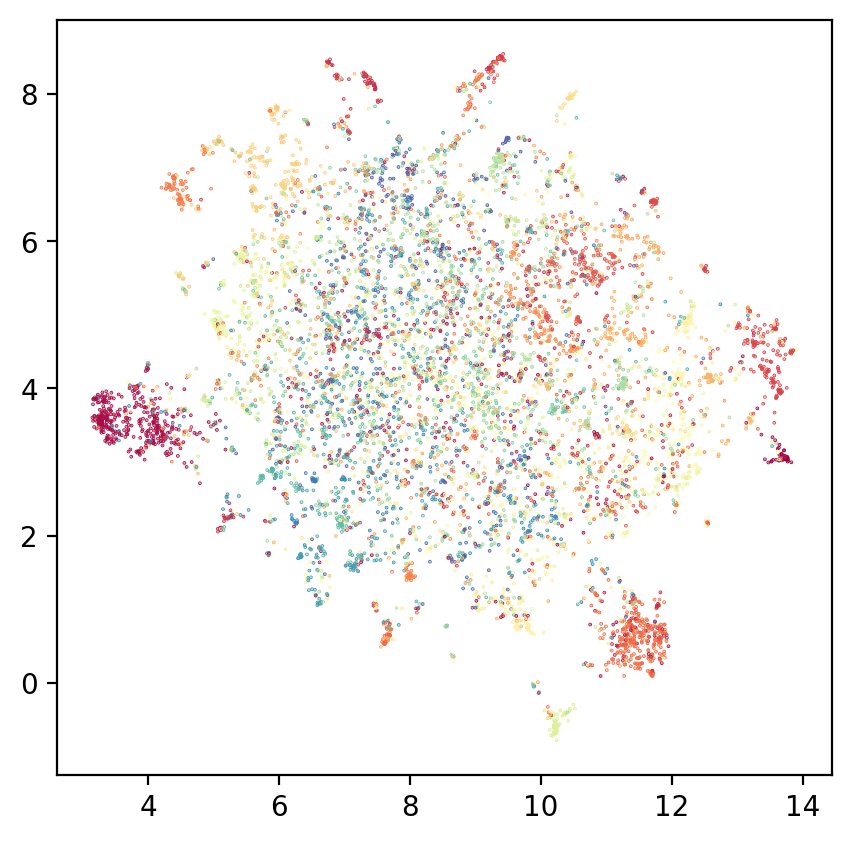

In [77]:
clustered = (labels >= 0)
plt.figure(figsize=(5, 5), dpi=200)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c = labels[clustered],
            s = 0.1,
            cmap = 'Spectral');

plt.savefig(filen)

In [86]:
nlabels = pd.DataFrame(labels)
nlabels.columns = ['clusterno']
nlabels.iloc[:,0].value_counts()

 1    10450
 0      410
-1       96
Name: clusterno, dtype: int64

In [92]:
standard_embedding

array([[11.315789 ,  6.1442046],
       [11.788268 ,  5.9165807],
       [10.988979 ,  6.252825 ],
       ...,
       [ 8.763695 ,  3.7012317],
       [ 8.537984 ,  7.1740355],
       [10.108577 ,  4.1912484]], dtype=float32)